## HW4

- **Task 1**: В папке находится изображение railway.jpeg с железной дорогой, уходящей вдаль от камеры. Необходимо, используя перспективное преобразование, развернуть дорогу таким образом, чтобы она была непосредственно перед нами. *Пример результата с подсказкой содержит изображение railway_result.png. Подсказка 2: чтобы было легче определять координаты ключевых точек изображения, отобразите его с помощью plt.imshow(img) (!не в ноутбуке) - в правом нижнем углу открытого окна будут отображаться координаты пикселей, на которые Вы наводите мышкой.*


- **Task 2**: В папке находится изображение palm.png с пальмой. Используя классические аффинные преобразования, необходимо создать "тень" для этой пальмы и отрисовать ее с ней на одном рисунке. Пример результата находится в изображении palm_result.png

In [1]:
import sys

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def plot_compare(img_1: np.ndarray, img_2: np.ndarray) -> None:    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    plt.imshow(img_1)
    plt.title('Before')
    
    plt.subplot(122)
    plt.imshow(img_2)
    plt.title('After')
    plt.show()

### Task 1

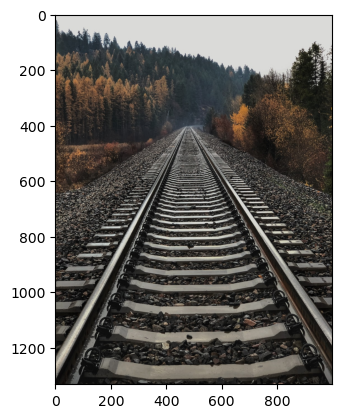

In [3]:
rw = cv.imread("images/railway.jpeg")
rw = cv.cvtColor(rw, cv.COLOR_BGR2RGB)
plt.imshow(rw)
plt.show()

In [4]:
# отметим ключевые точки
height, width = rw.shape[:2]

points = [
    [289, 601],
    [693, 599],
    [105, 820],
    [901, 810],
]

rw_copy = rw.copy()

for p in points:
    cv.circle(rw_copy, center=p, radius=15, color=(255, 0, 0), thickness=-1) 

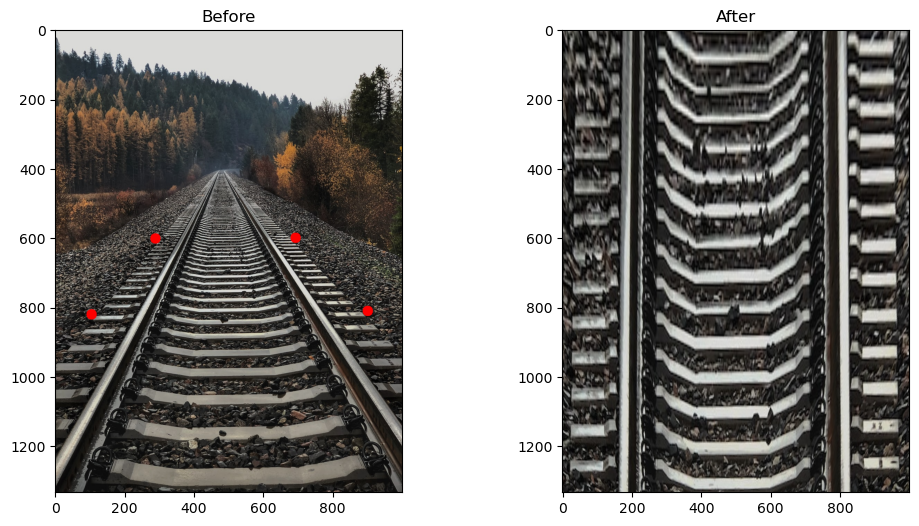

In [5]:
corners = [[0, 0], [width, 0], [0, height], [width, height]]
M = cv.getPerspectiveTransform(np.float32(points), np.float32(corners))
rw_persp = cv.warpPerspective(rw, M, (width, height))

plot_compare(rw_copy, rw_persp)

### Task 2

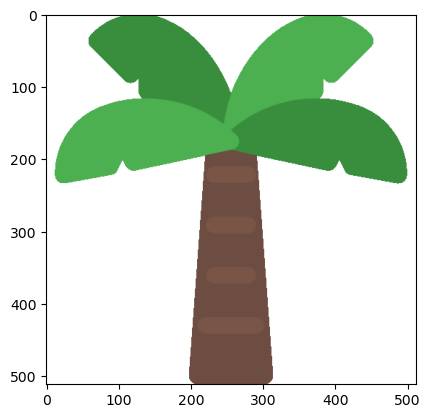

In [6]:
palmtree = cv.imread("images/palm.png")
palmtree = cv.cvtColor(palmtree, cv.COLOR_BGR2RGB)
plt.imshow(palmtree)
plt.show()

Чтобы достичь желаемого результата, сделаем черную копию пальмы без фона (позаимствовано [отсюда](https://www.kaggle.com/code/vadbeg/opencv-background-removal)), затем превратим ее афинными преобразованиями в тень и объединим со стоящей пальмой

In [7]:
def remove_background(img: np.ndarray, threshold: int) -> np.ndarray:
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    _, img_threshold = cv.threshold(img_gray, threshold, 255, cv.THRESH_BINARY_INV)

    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (11, 11))
    morphed = cv.morphologyEx(img_threshold, cv.MORPH_CLOSE, kernel)

    contours = cv.findContours(morphed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]
    contour = sorted(contours, key=cv.contourArea)[-1]

    mask = cv.drawContours(img_threshold, contour, 0, (0, 255, 0), 0)
    img_mask = cv.bitwise_and(img, img, mask=mask)

    x, y, w, h = cv.boundingRect(contour)
    img_black_background = img_mask[y:y + h, x:x + w]

    img_black_gray = cv.cvtColor(img_black_background, cv.COLOR_BGR2GRAY)
    
    _, alpha = cv.threshold(img_black_gray, 0, 255, cv.THRESH_BINARY)
    b, g, r = cv.split(img_black_background)

    rgba = [r, g, b, alpha]
    img_transparent = cv.merge(rgba, 4)

    return img_transparent

In [8]:
def convert_to_black(img: np.ndarray, threshold: int = 200) -> np.ndarray:
    img_black = cv.threshold(img, thresh=threshold, maxval=255, type=cv.THRESH_BINARY)[1]
    return img_black

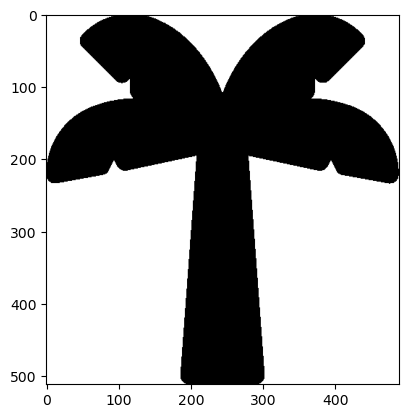

In [9]:
palmtree_transparent = remove_background(cv.imread("images/palm.png"), 200)
black_palmtree = convert_to_black(palmtree_transparent)

plt.imshow(black_palmtree)
plt.show()

In [10]:
black_palmtree.shape[:2]

(512, 488)

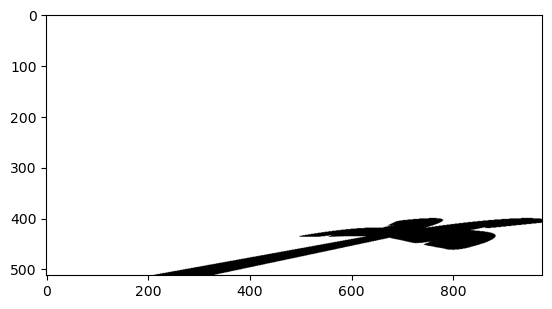

In [20]:
height, width = black_palmtree.shape[:2]

points_init = np.float32([[0, 0], [height, 0], [0, width], [height, width]])
points = np.float32([
    [700, 400], 
    [1100, 400],
    [180, 490], 
    [300, 600]]
)
width *= 2

M = cv.getPerspectiveTransform(np.float32(points_init), np.float32(points))
shadow = cv.warpPerspective(black_palmtree, M, (width, height))
plt.imshow(shadow)
plt.show()

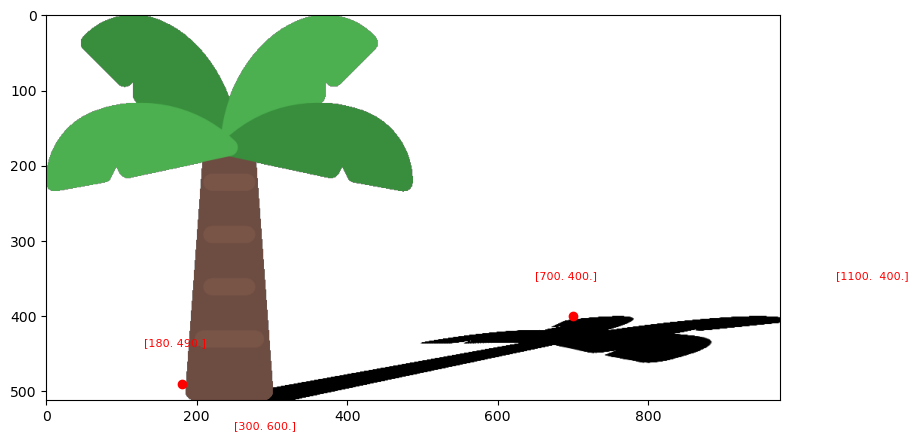

In [21]:
plt.figure(figsize=(16, 5))

for dot in points:
    plt.text(dot[0] - 50, dot[1] - 50, dot, color='red', fontsize=8)
    plt.scatter(*dot, color='red')

plt.imshow(shadow)
plt.imshow(palmtree_transparent)

plt.xlim(0, width)

plt.show()

### Practice

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Для удобочитаемого вывода матриц
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

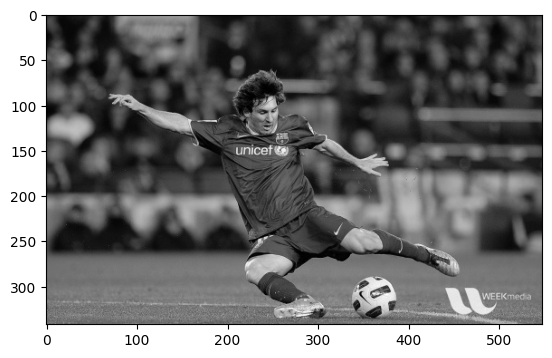

In [4]:
# Generating rotation matrix by description
img = cv.imread('assets/messi5.jpg', 0)
plt.imshow(img, cmap="grey")

In [5]:
height, width = img.shape[:2]
# rotation_center = (width / 2.0, height / 2.0)
rotation_center = (0, 0)
# angle = 45
angle = -45
# scale = 1.5
scale = 1

# Создаем матрицу поворота
M = cv.getRotationMatrix2D(rotation_center, angle, scale)
img_res = cv.warpAffine(img, M, (width, height))

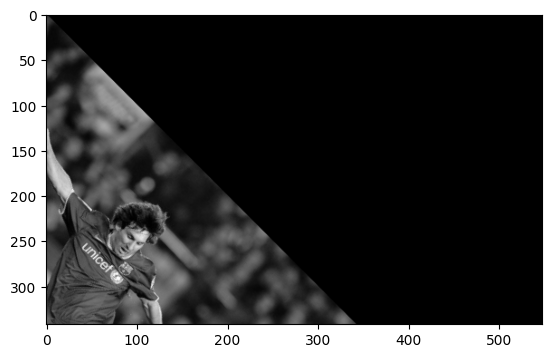

In [6]:
plt.imshow(img_res, cmap="grey")

In [7]:
print(M)

[[ 0.71 -0.71  0.  ]
 [ 0.71  0.71  0.  ]]


In [8]:
np.cos(np.radians(45))

0.7071067811865476

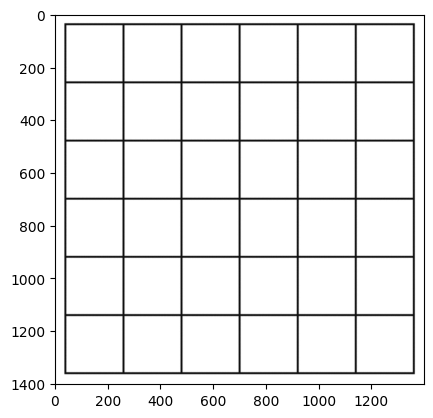

In [9]:
# Affine example

img = cv.imread('assets/grid.png', 0)
img_copy = img.copy()
plt.imshow(img, cmap="grey")

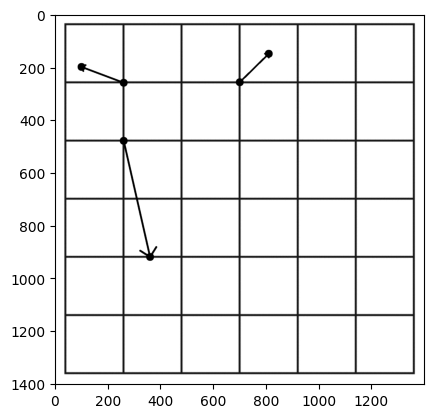

In [10]:
height, width = img.shape
pts1 = [
    [260, 260],
    [700, 258],
    [260, 480],
]
pts2 = [
    [100, 200],
    [810, 150],
    [360, 920],
]

BLACK = (0, 0, 0)
for p1, p2 in zip(pts1, pts2):
    cv.circle(img_copy, center=p1, radius=15, color=BLACK, thickness=-1)
    cv.circle(img_copy, center=p2, radius=15, color=BLACK, thickness=-1)
    cv.arrowedLine(img_copy, p1, p2, color=BLACK, thickness=6)  

plt.imshow(img_copy, cmap='gray')

In [11]:
M = cv.getAffineTransform(np.float32(pts1), np.float32(pts2))
img_res = cv.warpAffine(img, M, (width, height))

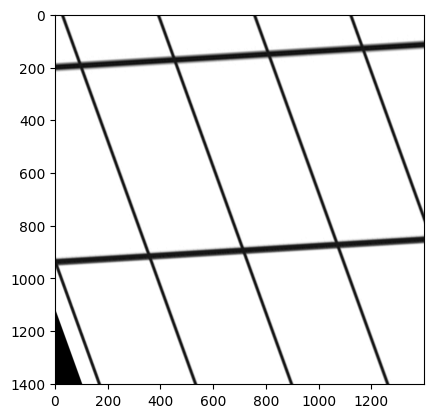

In [12]:
plt.imshow(img_res, cmap="grey")

In [13]:
# Perspective example

img = cv.imread('assets/sudoku.png', 0)
img_copy = img.copy()

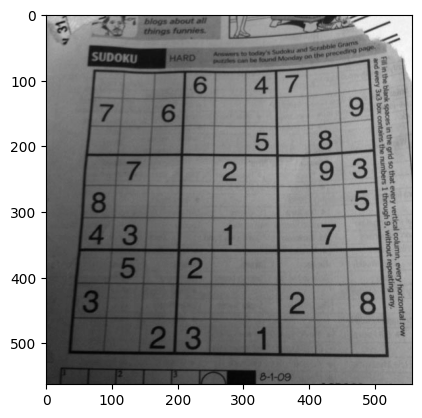

In [14]:
plt.imshow(img, cmap='gray')

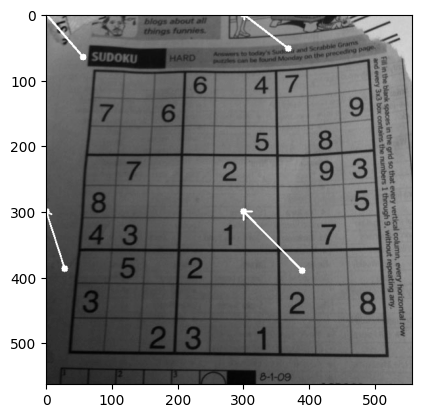

In [15]:
height, width = img.shape
pts1 = [
    [56, 65],
    [368, 52],
    [28, 387],
    [389, 390]
]
pts2 = [
    [0, 0],
    [300, 0],
    [0, 300],
    [300, 300]
]

WHITE = (255, 255, 255)
for p1, p2 in zip(pts1, pts2):
    cv.circle(img_copy, center=p1, radius=5, color=WHITE, thickness=-1)
    cv.circle(img_copy, center=p2, radius=5, color=WHITE, thickness=-1)
    cv.arrowedLine(img_copy, p1, p2, color=WHITE, thickness=2)

plt.imshow(img_copy, cmap='gray')

In [16]:
M = cv.getPerspectiveTransform(np.float32(pts1), np.float32(pts2))
img_res = cv.warpPerspective(img, M, (width, height))

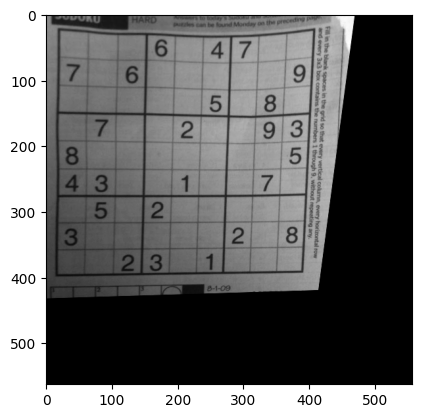

In [17]:
plt.imshow(img_res, cmap='gray')

### Practice 2 

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [6]:
img = cv.imread("assets/j.png", 0)

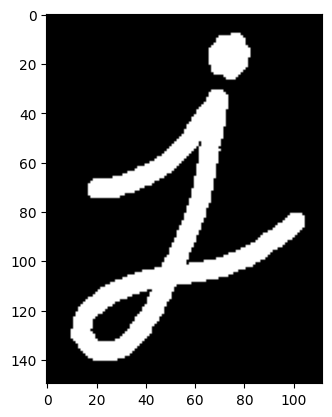

In [7]:
plt.imshow(img, cmap="grey")

In [13]:
kernel = np.ones((5, 5), np.uint8)
dilation = cv.dilate(img, kernel, iterations=1)

In [18]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

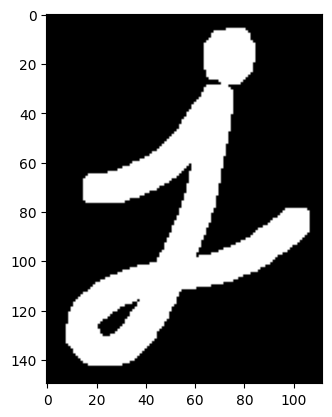

In [14]:
plt.imshow(dilation, cmap="grey")

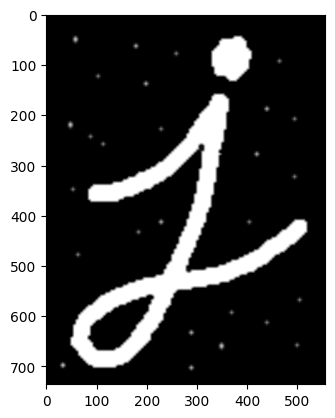

In [33]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
erosion = cv.erode(img, kernel, iterations=1)
plt.imshow(erosion, cmap="grey")

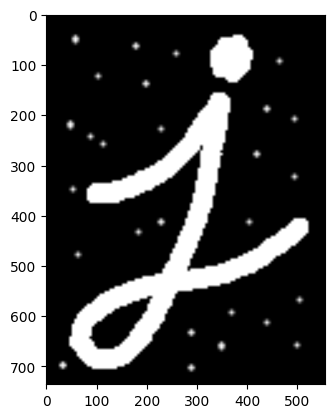

In [40]:
img = cv.imread("assets/j_stars.png", 0)
plt.imshow(img, cmap="grey")

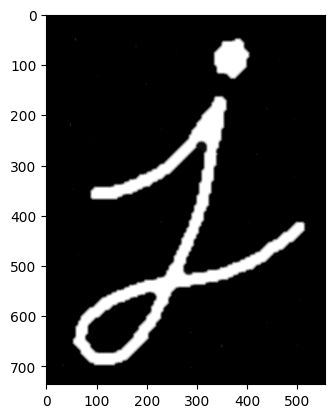

In [41]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (17, 17))

erosion = cv.erode(img, kernel, iterations=1)
plt.imshow(erosion, cmap="grey")

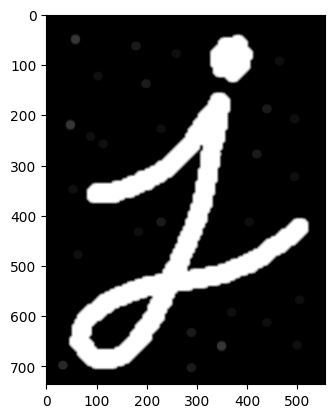

In [42]:
dilation = cv.dilate(erosion, kernel, iterations=1)
plt.imshow(dilation, cmap="grey")